#**Assignment 2 - Classification Models**


## Experiment 1: Logistic Regression

In this assignment, we will be working on a binary classification problem. You will have to build a model that can predict if an existing customer is more likely to buy a new car. The results of your model can be used for targeting leads for a marketing campaign

Dataset can be downloaded https://drive.google.com/file/d/177p-Vaa2__BtaxNCmd4YGBv7zfENUNmy/view?usp=sharingLinks 

The steps are:
1.   Load and explore dataset
2.   Data Cleaning
3.   Data Splitting
4.   Assess Baseline model
5.   Train Logistic Regression Classifier
6.   Train Logistic Regression Classifier with L1 and L2 Regularisation
7.   Train KNN Classifier
8.   Build a KNN model using euclidian distance and 55 neighbors
9.   Build a KNN model using euclidian distance and 50 neighbors
10.  Build a KNN model using euclidian distance and 40 neighbors
11.  Assess the Best Model on the Testing Set


## 1. Load and explore dataset

**[1.1]** Import the pandas and numpy packages

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**[1.2]** Mounting the drive

In this notebook, I'm mounting the Google drive to read a csv file that is stored on my drive. You must allow access to your drive by signing in to your Google account.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Download the repurchase_training.csv from here: https://drive.google.com/file/d/177p-Vaa2__BtaxNCmd4YGBv7zfENUNmy/view?usp=sharingLinks

Then, copy it to your Google drive folder which contains the notebook

In [ ]:
# After executing the cell above, Drive files will be present in "/content/drive/My Drive". The below command lists the contents in the drive:
!ls "/content/drive/My Drive"

 AT2_default_template.gdoc
 atlassian_reviews.csv
 CNN_Articles_2021-2023.csv
 CNN_Articles_2021-2023.gsheet
'Colab Notebooks'
'Copy of Data meaning https:  tinyurl.com DSI-Dmean-c (1).gsheet'
'Copy of Data meaning https:  tinyurl.com DSI-Dmean-c (2).gsheet'
'Copy of Data meaning https:  tinyurl.com DSI-Dmean-c (3).gsheet'
'Copy of Data meaning https:  tinyurl.com DSI-Dmean-c.gsheet'
'Copy of MLAA - Lecture 1.gslides'
'Copy of MLAA - Lecture 2.gslides'
'Copy of MLAA - Lecture 5.gslides'
 data
'DSP_AT3 _REPORT.gdoc'
'DSP - Lab 4 - Exercise 1 - Solutions.gdoc'
 DVN_data
'Experiment reports'
'Experiment reports 2'
 glassdoor_data
 Lambda_Project_Report_Draft.gdoc
 NLP_data
'ODI Data Ethics Canvas.gdoc'
'Reddit_Data (1).csv'
 Untitled
'Untitled document (1).gdoc'
'Untitled document.gdoc'


**[1.3]** Create a variable called file_url containing the link to the CSV file and load the dataset into dataframe called df

In [ ]:

file_url = pd.read_csv('/content/drive/My Drive/data/repurchase_training.csv')
df = pd.DataFrame(file_url)

In [ ]:
# Unit Tests
assert isinstance(df, pd.DataFrame)

**[1.4]** Display the first 5 rows of df


In [ ]:
df.head()

,ID,Target,age_band,gender,car_model,car_segment,age_of_vehicle_years,sched_serv_warr,non_sched_serv_warr,sched_serv_paid,non_sched_serv_paid,total_paid_services,total_services,mth_since_last_serv,annualised_mileage,num_dealers_visited,num_serv_dealer_purchased
0,1,0,3. 35 to 44,Male,model_1,LCV,9,2,10,3,7,5,6,9,8,10,4
1,2,0,NaN,NaN,model_2,Small/Medium,6,10,3,10,4,9,10,6,10,7,10
2,3,0,NaN,Male,model_3,Large/SUV,9,10,9,10,9,10,10,7,10,6,10
3,5,0,NaN,NaN,model_3,Large/SUV,5,8,5,8,4,5,6,4,10,9,7
4,6,0,NaN,Female,model_2,Small/Medium,8,9,4,10,7,9,8,5,4,4,9


**[1.5]** Display the dimensions of df

In [ ]:
df.shape

(131337, 17)

**[1.6]** Display the summary of df

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131337 entries, 0 to 131336
Data columns (total 17 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   ID                         131337 non-null  int64 
 1   Target                     131337 non-null  int64 
 2   age_band                   18962 non-null   object
 3   gender                     62029 non-null   object
 4   car_model                  131337 non-null  object
 5   car_segment                131337 non-null  object
 6   age_of_vehicle_years       131337 non-null  int64 
 7   sched_serv_warr            131337 non-null  int64 
 8   non_sched_serv_warr        131337 non-null  int64 
 9   sched_serv_paid            131337 non-null  int64 
 10  non_sched_serv_paid        131337 non-null  int64 
 11  total_paid_services        131337 non-null  int64 
 12  total_services             131337 non-null  int64 
 13  mth_since_last_serv        131337 non-null  

It seeems that we have two columns with missing data (**age_band and
gender**).

**[1.7]** Create a for loop that will iterate through each columns and print their list of unique values

In [ ]:
for col in df.columns:
  print(col)
  print(df[col].unique())

ID
[     1      2      3 ... 154137 154138 154139]
Target
[0 1]
age_band
['3. 35 to 44' nan '1. <25' '4. 45 to 54' '2. 25 to 34' '7. 75+'
 '5. 55 to 64' '6. 65 to 74']
gender
['Male' nan 'Female']
car_model
['model_1' 'model_2' 'model_3' 'model_5' 'model_6' 'model_4' 'model_7'
 'model_8' 'model_9' 'model_10' 'model_11' 'model_13' 'model_12'
 'model_14' 'model_15' 'model_16' 'model_17' 'model_18' 'model_19']
car_segment
['LCV' 'Small/Medium' 'Large/SUV' 'Other']
age_of_vehicle_years
[ 9  6  5  8  7  1  3  4 10  2]
sched_serv_warr
[ 2 10  8  9  4  1  3  7  5  6]
non_sched_serv_warr
[10  3  9  5  4  8  1  6  2  7]
sched_serv_paid
[ 3 10  8  5  2  6  1  4  9  7]
non_sched_serv_paid
[ 7  4  9  3  1  2  6  5 10  8]
total_paid_services
[ 5  9 10  6  8  1  2  7  3  4]
total_services
[ 6 10  8  4  2  1  3  5  9  7]
mth_since_last_serv
[ 9  6  7  4  5  8  1  3 10  2]
annualised_mileage
[ 8 10  4  5  6  1  7  3  9  2]
num_dealers_visited
[10  7  6  9  4  5  2  1  3  8]
num_serv_dealer_purchased
[

**[1.7]** Display the descriptive statictics of df


In [ ]:
df.describe()

,ID,Target,age_of_vehicle_years,sched_serv_warr,non_sched_serv_warr,sched_serv_paid,non_sched_serv_paid,total_paid_services,total_services,mth_since_last_serv,annualised_mileage,num_dealers_visited,num_serv_dealer_purchased
count,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000
mean,77097.384180,0.026809,5.493022,5.452500,5.472517,5.452287,5.497050,5.481692,5.454967,5.469807,5.502836,5.485438,5.480778
std,44501.636704,0.161525,2.843299,2.884328,2.870665,2.886528,2.878699,2.880408,2.875961,2.859756,2.854896,2.876772,2.867524
min,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,38563.000000,0.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,77132.000000,0.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
75%,115668.000000,0.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000
max,154139.000000,1.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


**[1.8]** Distribution of class 0 and 1 

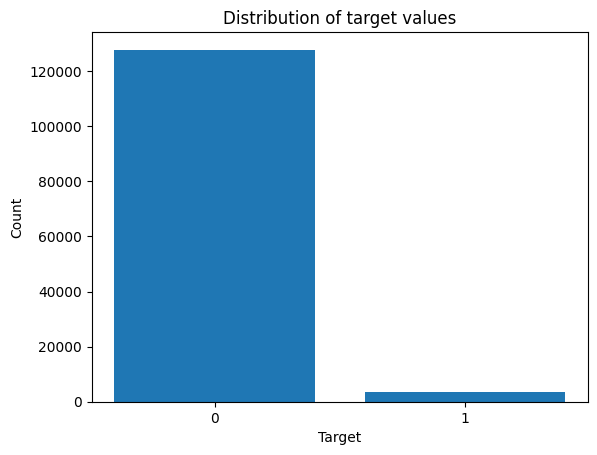

In [ ]:
target_counts = df['Target'].value_counts()
x_labels = ['0', '1']  # labels for the x-axis

plt.bar(x_labels, target_counts)
plt.xlabel('Target')
plt.ylabel('Count')
plt.title('Distribution of target values')
plt.show()

## 2. Data Cleaning

**[2.1]** Create a copy of the dataframe

In [ ]:
df_cleaned = df.copy()

In [ ]:
# Unit Tests
assert isinstance(df_cleaned, pd.DataFrame)
assert df_cleaned.shape == df.shape

**[2.2]** Print the list of distinct values of Target

In [ ]:
print(df_cleaned.Target.unique())


[0 1]


**[2.3]** Find all the duplicated rows in the dataframe

In [ ]:
dup = df_cleaned.duplicated()
df_cleaned[dup]

,ID,Target,age_band,gender,car_model,car_segment,age_of_vehicle_years,sched_serv_warr,non_sched_serv_warr,sched_serv_paid,non_sched_serv_paid,total_paid_services,total_services,mth_since_last_serv,annualised_mileage,num_dealers_visited,num_serv_dealer_purchased


**[2.4]** Dropping  "ID" and "age_band" columns

In [ ]:
df_cleaned = df_cleaned.drop(['ID', 'age_band'], axis='columns')

**[2.5]** Check there is no missing value for all columns

In [ ]:
df_cleaned.isna().sum()

Target                           0
gender                       69308
car_model                        0
car_segment                      0
age_of_vehicle_years             0
sched_serv_warr                  0
non_sched_serv_warr              0
sched_serv_paid                  0
non_sched_serv_paid              0
total_paid_services              0
total_services                   0
mth_since_last_serv              0
annualised_mileage               0
num_dealers_visited              0
num_serv_dealer_purchased        0
dtype: int64

**[2.6]** Import OrdinalEncoder from sklearn.preprocessing

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

**[2.7]** Create a list called 'car_model_categories' containing the list of values ordered from the smallest to the highest

In [ ]:
car_model_categories = [['model_1', 'model_2', 'model_3', 'model_4', 'model_5', 'model_6', 'model_7',
 'model_8', 'model_9', 'model_10', 'model_11', 'model_12', 'model_13', 
 'model_14', 'model_15', 'model_16', 'model_17', 'model_18', 'model_19']]

In [ ]:
# Unit Tests
assert isinstance(car_model_categories, list)
assert isinstance(car_model_categories[0], list)
assert len(car_model_categories[0]) == 19

**[2.8]** Instantiate the OrdinalEncoder class with 'car_model_categories'  as categories and save it into a variable called  'car_model_enc'

In [ ]:
car_model_enc = OrdinalEncoder(categories = car_model_categories)

**[2.9]** Use our trained encoder to transform this column:

In [ ]:
df_cleaned['car_model_encoded'] = car_model_enc.fit_transform(df_cleaned[['car_model']])

**[2.10]** Display the columns 'car_model', 'car_model_encoded'

In [ ]:
df_cleaned[['car_model','car_model_encoded']]

,car_model,car_model_encoded
0,model_1,0.0
1,model_2,1.0
2,model_3,2.0
3,model_3,2.0
4,model_2,1.0
...,...,...
131332,model_3,2.0
131333,model_3,2.0
131334,model_5,4.0
131335,model_5,4.0


**[2.11]** Replace the values of 'car_model' with its encoded version and remove the 'car_model_encoded' column

In [ ]:
df_cleaned['car_model'] = df_cleaned['car_model_encoded']
df_cleaned.drop('car_model_encoded', axis=1, inplace=True)
df_cleaned['car_model'].unique()

array([ 0.,  1.,  2.,  4.,  5.,  3.,  6.,  7.,  8.,  9., 10., 12., 11.,
       13., 14., 15., 16., 17., 18.])

**[2.12]** Repeat the same process to convert 'car_segment' into index mapping

In [ ]:
df_cleaned = df_cleaned[df_cleaned['car_segment'] != 'Other']

In [ ]:
# Define the categories of the car_segment column
car_segment_cats = ['Small/Medium', 'LCV', 'Large/SUV']
# Create an instance of the OrdinalEncoder class with the defined categories
car_segment_enc = OrdinalEncoder(categories=[car_segment_cats])
# Fit and transform the "car_segment" column using the fitted encoder
df_cleaned['car_segment_encoded'] = car_segment_enc.fit_transform(df_cleaned[['car_segment']])


<ipython-input-26-c59b8f58ec4e>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['car_segment_encoded'] = car_segment_enc.fit_transform(df_cleaned[['car_segment']])


**[2.13]** Replace the values of 'car_segment' with its encoded version and remove the 'car_segment'_encoded' column

In [ ]:
df_cleaned['car_segment'] = df_cleaned['car_segment_encoded']
df_cleaned.drop('car_segment_encoded', axis=1, inplace=True)
df_cleaned['car_segment'].unique()

<ipython-input-27-8fb44f7b9469>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['car_segment'] = df_cleaned['car_segment_encoded']
<ipython-input-27-8fb44f7b9469>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.drop('car_segment_encoded', axis=1, inplace=True)


array([1., 0., 2.])

**[2.14]** One hot encoding for "gender" column

In [ ]:
# Fill missing values with 0
df_cleaned["gender"].fillna(0, inplace=True)

# Perform one-hot encoding
df_cleaned = pd.get_dummies(df_cleaned, columns=["gender"], dummy_na=False, prefix=["gender"])

**[2.15]** Display the head of the dataframe

In [ ]:
df_cleaned.head()

,Target,car_model,car_segment,age_of_vehicle_years,sched_serv_warr,non_sched_serv_warr,sched_serv_paid,non_sched_serv_paid,total_paid_services,total_services,mth_since_last_serv,annualised_mileage,num_dealers_visited,num_serv_dealer_purchased,gender_0,gender_Female,gender_Male
0,0,0.0,1.0,9,2,10,3,7,5,6,9,8,10,4,0,0,1
1,0,1.0,0.0,6,10,3,10,4,9,10,6,10,7,10,1,0,0
2,0,2.0,2.0,9,10,9,10,9,10,10,7,10,6,10,0,0,1
3,0,2.0,2.0,5,8,5,8,4,5,6,4,10,9,7,1,0,0
4,0,1.0,0.0,8,9,4,10,7,9,8,5,4,4,9,0,1,0


**[2.16]** Display the dimensions of df

In [ ]:
df_cleaned.shape

(131279, 17)

**[2.17]** Export cleaned training dataset to csv file stored in drive

In [ ]:
df_cleaned.to_csv('/content/drive/My Drive/data/repurchase_training_cleaned.csv')

## 3. Data Splitting

**[3.1]** Extract the target variable into a variable called y

In [ ]:
y = df_cleaned.pop('Target')

**[3.2]** Create a variable called X that contains all the variables

In [ ]:
X = df_cleaned

**[3.3]** Import train_test_split from sklearn.model_selection

In [ ]:
from sklearn.model_selection import train_test_split

**[3.4]** Split the features and target variable into 2 different sets (data and test) with 90-10 ratio

In [ ]:
X_data, X_test, y_data, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

**[3.5]** Split the features and target variable into 2 different sets (training and validation) with 90-10 ratio

In [ ]:
# Solution
X_train, X_val, y_train, y_val = train_test_split(X_data, y_data, test_size=0.1, random_state=42)

## 4. Assess Baseline Model

**[4.1]** Find the mode of the target variable and save it into a variable called y_mode

In [ ]:
y_mode = y.mode()

**[4.2]** Create a numpy array called y_base filled with this value of same length of y_train

In [ ]:
y_base = np.full(y_train.shape, y_mode)

In [ ]:
# Unit Tests
assert isinstance(y_base, np.ndarray)
assert y_base.shape == y_train.shape

**[4.3]** Import the accuracy score from sklearn

In [ ]:
from sklearn.metrics import accuracy_score

**[4.4]** Display the accuracy score of this baseline model using the training set

In [ ]:
accuracy_score(y_train, y_base)

0.9730474443974232

## 5. Train Logistic Regression Classifier

**[5.1]** Import the LogisticRegression class from sklearn

In [ ]:
from sklearn.linear_model import LogisticRegression

**[5.2]** Instantiate our model



In [ ]:
log_reg = LogisticRegression()

**[5.3]** Fit our model with the training data

In [ ]:
log_reg.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

**[5.4]** Use the trained model to predict the outcome on X_train and save them into y_preds

In [ ]:
y_train_preds = log_reg.predict(X_train)

In [ ]:
# Unit Tests
assert isinstance(y_train_preds, np.ndarray)
assert y_train_preds.shape == y_train.shape

**[5.5]** Display the accuracy score for the training set

In [ ]:
accuracy_score(y_train, y_train_preds)

0.9775896929515211

**[5.6]** Display the accuracy score for the validation set

In [ ]:
y_val_preds = log_reg.predict(X_val)
accuracy_score(y_val, y_val_preds)

0.9772342586323629

In [ ]:
# Unit Tests
assert isinstance(y_val_preds, np.ndarray)
assert y_val_preds.shape == y_val.shape

## 6. Train Logistic Regression Classifier with L1 and L2 Regularisation

**[6.1]** Instantiate a Logistic Regression with L1 and L2 regularisation


In [ ]:
log_elastic_reg = LogisticRegression(penalty='elasticnet', l1_ratio=0.5, solver='saga')

**[6.2]** Fit our model with the training data

In [ ]:
log_elastic_reg.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(l1_ratio=0.5, penalty='elasticnet', solver='saga')

**[6.3]** Display the accuracy score for the training set

In [ ]:
y_train_preds_elastic = log_elastic_reg.predict(X_train)
accuracy_score(y_train, y_train_preds_elastic)

0.977599097192834

**[6.4]** Display the accuracy score for the validation set

In [ ]:
y_val_preds_elastic = log_elastic_reg.predict(X_val)
accuracy_score(y_val, y_val_preds_elastic)

0.9772342586323629

## 7.   Train KNN Classifier

**[7.1]** Import the KNeighborsClassifier module from sklearn

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

**[7.2]** Instantiate a KNN model into a variable called knn_default_class with 10 neighbors and Euclidean distance

In [ ]:
knn_10_euc_class = KNeighborsClassifier(n_neighbors=10, metric='euclidean')

**[7.3]** Fit knn_default_reg on the training set

In [ ]:
knn_10_euc_class.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=10)

**[7.4]** Display the accuracy score on the training set

In [ ]:
y_train_preds_knn_10_euc = knn_10_euc_class.predict(X_train)
accuracy_score(y_train, y_train_preds_knn_10_euc)

0.9865801476465886

**[7.5]** Display the accuracy score on the validation set

In [ ]:
y_val_preds_knn_10_euc = knn_10_euc_class.predict(X_val)
accuracy_score(y_val, y_val_preds_knn_10_euc)

0.9854434664861205

## 8. Build a KNN model using euclidian distance and 55 neighbors

**[8.1]** Instantiate our model with n_neighbors=55 and metric:'euclidean' and fit on the training set

In [ ]:
knn_55_euc_class = KNeighborsClassifier(n_neighbors=55, metric='euclidean')
knn_55_euc_class.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=55)

**[8.2]** Display the accuracy score on the training set

In [ ]:
y_train_preds_knn_55_euc = knn_55_euc_class.predict(X_train)
accuracy_score(y_train, y_train_preds_knn_55_euc)

0.9826867917430762

**[8.3]** Display the accuracy score on the validation set

In [ ]:
y_val_preds_knn_55_euc = knn_55_euc_class.predict(X_val)
accuracy_score(y_val, y_val_preds_knn_55_euc)

0.983073798239675

## 9. Build a KNN model using euclidian distance and 50 neighbors

**[9.1]** Instantiate our model with n_neighbors= 50 and metric:'euclidean' and fit on the training set, then display the accuracy score on the training set

In [ ]:
knn_50_euc_class = KNeighborsClassifier(n_neighbors=50, metric='euclidean')
knn_50_euc_class.fit(X_train, y_train)
y_train_preds_knn_50_euc = knn_50_euc_class.predict(X_train)
accuracy_score(y_train, y_train_preds_knn_50_euc)

0.9827526214322659

**[9.2]** Display the accuracy score on the validation set

In [ ]:
y_val_preds_knn_50_euc = knn_50_euc_class.predict(X_val)
accuracy_score(y_val, y_val_preds_knn_50_euc)

0.983073798239675

## 10. Build a KNN model using euclidian distance and 40 neighbors

**[10.1]** Instantiate our model with n_neighbors= 40 and metric:'euclidean' and fit on the training set, then display the accuracy score on the training set

In [ ]:
knn_40_euc_class = KNeighborsClassifier(n_neighbors=40, metric='euclidean')
knn_40_euc_class.fit(X_train, y_train)
y_train_preds_knn_40_euc = knn_40_euc_class.predict(X_train)
accuracy_score(y_train, y_train_preds_knn_40_euc)

0.9834203225654771

**[10.2]** Display the accuracy score on the validation set

In [ ]:
y_val_preds_knn_40_euc = knn_40_euc_class.predict(X_val)
accuracy_score(y_val, y_val_preds_knn_40_euc)

0.9834123222748815

## 11. Assess the Best Model on the Testing Set

Using the KNN model using euclidian distance and 40 neighbors, display the accuracy score on the testing set

In [ ]:
y_test_preds_knn_40_eucc = knn_40_euc_class.predict(X_test)
accuracy_score(y_test, y_test_preds_knn_40_eucc)

0.9844606946983546